In [6]:
import pandas as pd
df_cust = pd.read_clipboard()
df_order = pd.read_clipboard()

In [8]:
with pd.ExcelWriter("path_to_file.xlsx") as writer:
    df_cust.to_excel(writer, sheet_name="Sheet1")  
    df_order.to_excel(writer, sheet_name="Sheet2")  

In [18]:
df_temp = df_cust.merge(df_order, how='inner', on='CustomerID')[['Country','CustomerName','OrderID']]
df = pd.DataFrame(df_temp.groupby(['Country','CustomerName'])['OrderID'].count())
df.reset_index(inplace=True)
df.sort_values("OrderID", ascending=False, inplace=True)

In [96]:
filt_df = pd.DataFrame(df.groupby('Country')['OrderID'].max().sort_values())
filt_df.reset_index(inplace=True)
filt_df.sort_values("OrderID", ascending=False, inplace=True)

In [101]:
df_h = df.merge(filt_df, how='inner', on=['Country','OrderID'])

<AxesSubplot:>

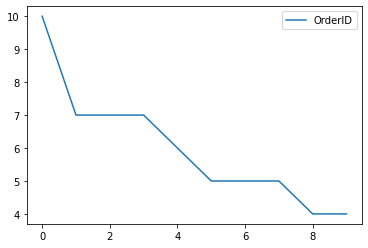

In [105]:
df_h.head(10).plot(kind='line')

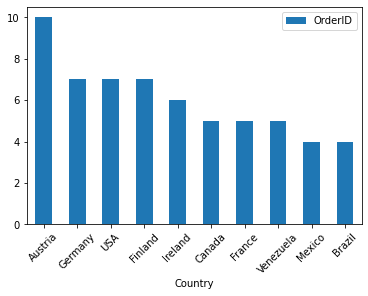

In [133]:
import matplotlib.pyplot as plt
df_h.head(10).plot(x='Country', y='OrderID', kind='bar', rot=45)
plt.show()